In [3]:
import sys

sys.path.append("../src")

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
from scipy.integrate import quad
import sto_ng
import h5py

importlib.reload(sto_ng)
from sto_ng import *

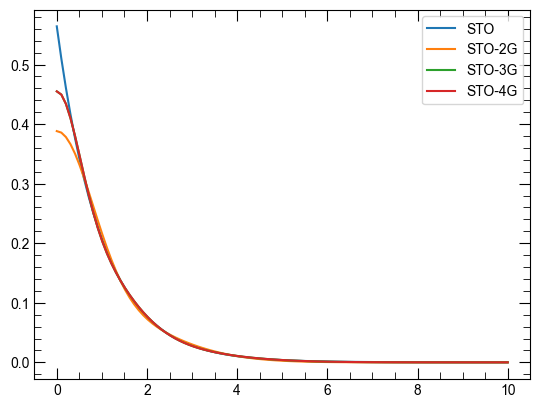

In [5]:
initial_params = np.array([1.0, 0.8, 0.5, 0.5])

with h5py.File("sto_ng.h5", "w") as f:
    grps_1s = f.create_group("1s")
    fig, ax = plt.subplots()
    r = np.linspace(0, 10, 100)
    zeta = 1
    approximator = GaussianApproximator1s(initial_params, zeta)
    y = approximator.phi_1s(zeta, r)
    ax.plot(r, y, label="STO")
    optimized_params = approximator.optimize().x

    # 偶数番目と奇数番目のパラメータを分割
    alpha = optimized_params[::2]  # 偶数番目
    c = optimized_params[1::2]  # 奇数番目

    subgrp = grps_1s.create_group("sto-2g")
    subgrp.create_dataset("alpha", data=alpha)
    subgrp.create_dataset("c", data=c)

    y2 = approximator.phi_approx_g1s(optimized_params, r)
    ax.plot(r, y2, label=f"STO-{2}G")
    for n_gaussians in range(3, 5):
        initial_params = np.hstack((initial_params, [0.5, 0.3]))
        zeta = 1.0
        approximator = GaussianApproximator1s(initial_params, zeta)
        optimized_params = approximator.optimize().x

        # 偶数番目と奇数番目のパラメータを分割
        alpha = optimized_params[::2]
        c = optimized_params[1::2]

        subgrp = grps_1s.create_group(f"sto-{n_gaussians}g")
        subgrp.create_dataset("alpha", data=alpha)
        subgrp.create_dataset("c", data=c)

        y2 = approximator.phi_approx_g1s(optimized_params, r)
        ax.plot(r, y2, label=f"STO-{n_gaussians}G")
    ax.legend()

[1, 3]